Predicción del riesgo de enfermedad cardiovascular con regresion logistica

1. Carga de datos

In [1]:
#Preparación del entorno de trabajo con las librerias necesarias

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#Carga de la informacion del CSV en una variable llamada dataframe
dataframe = pd.read_csv(r"D:\Descargas\framingham.csv", sep=",")

In [3]:
#Muestra de datos iniciales del dataframe
dataframe.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


1.1 Validacion de datos

In [4]:
#validar valores faltantes
dataframe.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
#Reemplazamos los valores faltantes en cada característica con el valor medio 
#   o mediano de esa característica en todo el conjunto de datos.
dataframe['education'].fillna(dataframe['education'].mean(), inplace=True)
dataframe['cigsPerDay'].fillna(dataframe['cigsPerDay'].mean(), inplace=True)
dataframe['BPMeds'].fillna(dataframe['BPMeds'].mean(), inplace=True)
dataframe['totChol'].fillna(dataframe['totChol'].mean(), inplace=True)
dataframe['BMI'].fillna(dataframe['BMI'].mean(), inplace=True)
dataframe['heartRate'].fillna(dataframe['heartRate'].mean(), inplace=True)
dataframe['glucose'].fillna(dataframe['glucose'].mean(), inplace=True)

In [6]:
#Verificamos nuevamente que no hayan valores nulos
dataframe.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
#Verificamos que no hayan valores repetidos
dataframe.duplicated().sum()

0

In [8]:
#Mostramos estadisticas 
dataframe.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


2. Desarrollo

2.1 Visualizacion de Datos

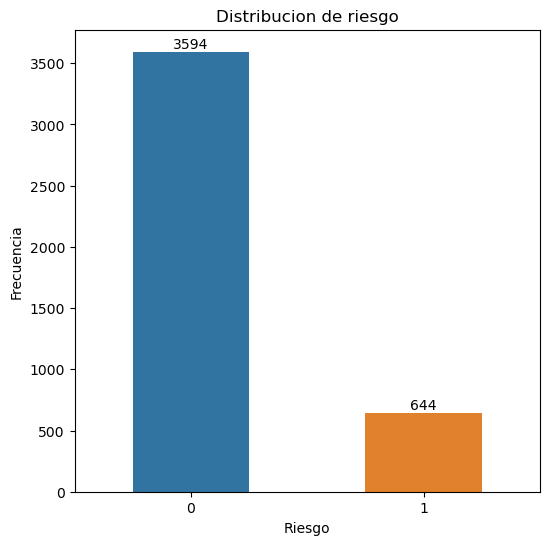

In [9]:
#Visualizamos la distribucion de los datos
#CDH = Riesgo a 10 años de desarrollar enfermedad coronaria o cardiovascular
plt.figure(figsize=(6,6))
barra=sb.countplot(x=dataframe["TenYearCHD"], width=0.5)
plt.xlabel('Riesgo')
plt.ylabel('Frecuencia')
plt.title('Distribucion de riesgo')
#Opcion de mostrar los datos en cada barra
for valor in barra.containers: barra.bar_label(valor)
plt.show()

<Axes: >

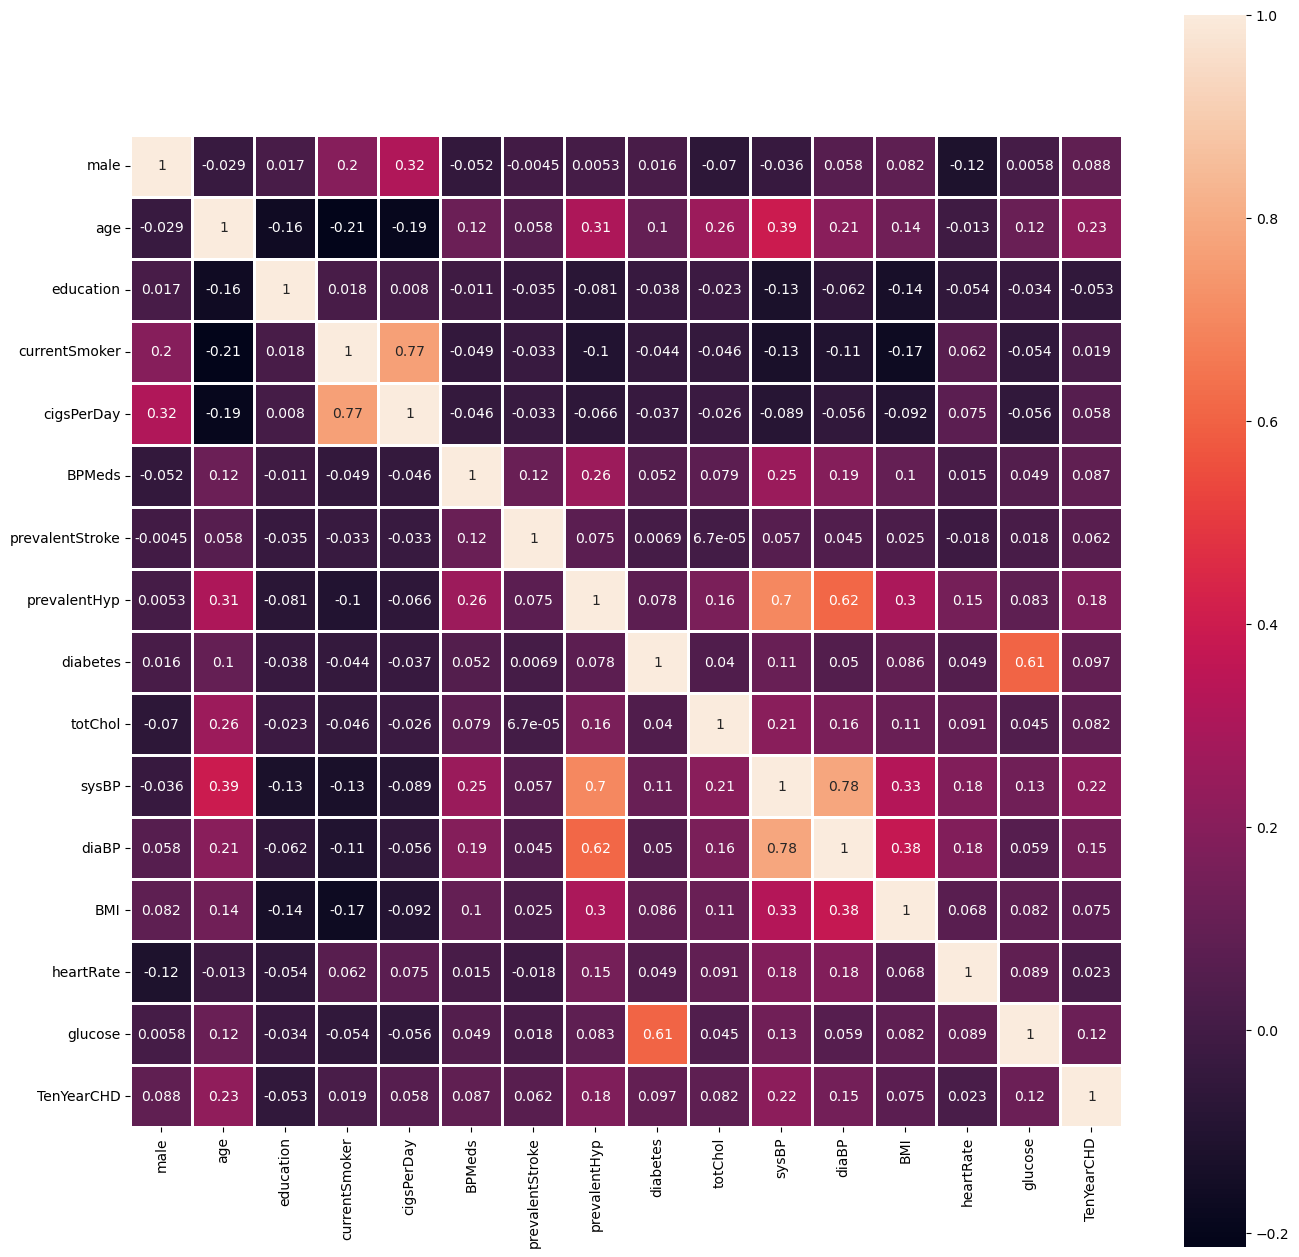

In [10]:
#Vemos la correlacion entre las diferentes columnas
plt.figure(figsize=(16, 16))
corr=dataframe.corr()
a=sb.heatmap(corr,annot=True,linecolor='white',linewidths=2,cbar=True,square=True)
a

2.2 Creacion del modelo de regresión logística

In [11]:
#Declaramos las columnas excluyendo la de TenYearCHD y la usamos para el eje Y
x = dataframe.drop(columns='TenYearCHD')
y = dataframe['TenYearCHD']

In [12]:
#Separamos los datos para entrenar y probar 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
#Realizamos el modelo de escalado
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
#Creacion del modelo
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [15]:
#Hacemos predicciones y las mostramos
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

2.3 Resultados del modelo

In [16]:
#Presicion del modelo
precision= accuracy_score(y_test, y_pred)
#Presentamos el resultado formateado en porcentaje
print(f'Precisión del modelo: {precision * 100:.2f}%')

Precisión del modelo: 84.20%


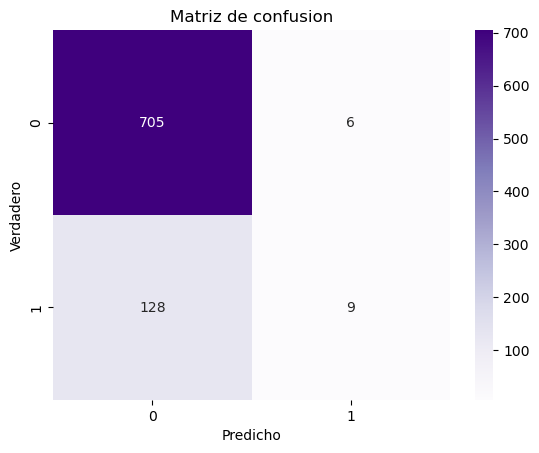

In [17]:
#Matriz de confusion
column_labels = list(y_test.unique())
cm=confusion_matrix(y_test, y_pred,labels=column_labels)
cm
sb.heatmap(cm,annot=True,fmt="d", cmap="Purples", xticklabels=column_labels, yticklabels=column_labels)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de confusion')
plt.show()

In [18]:
#Reporte del modelo
reporte = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", reporte)

NameError: name 'report' is not defined